In [1]:
from google.colab import files

uploaded = files.upload()


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

print("Train Data:")
print(train.head())

print("\nTest Data:")
print(test.head())


Train Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

In [4]:
train.info()
train.describe()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


/tmp/ipython-input-2272694615.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train, palette="coolwarm")


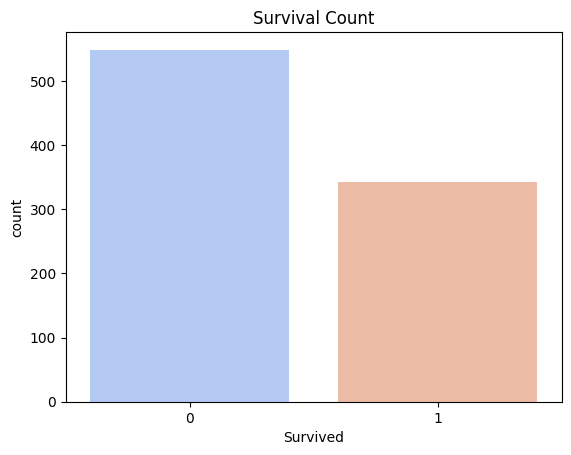

In [5]:
sns.countplot(x="Survived", data=train, palette="coolwarm")
plt.title("Survival Count")
plt.show()


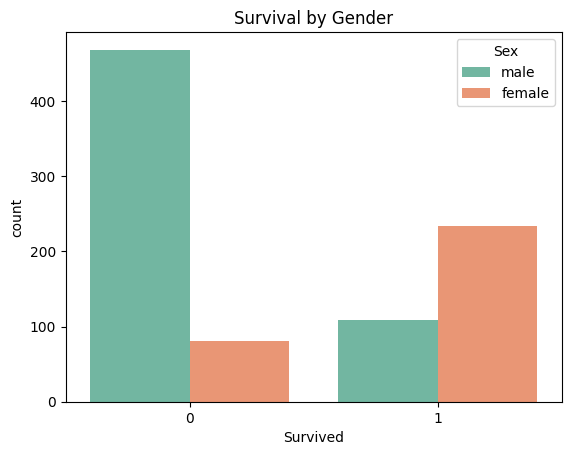

In [6]:
sns.countplot(x="Survived", hue="Sex", data=train, palette="Set2")
plt.title("Survival by Gender")
plt.show()


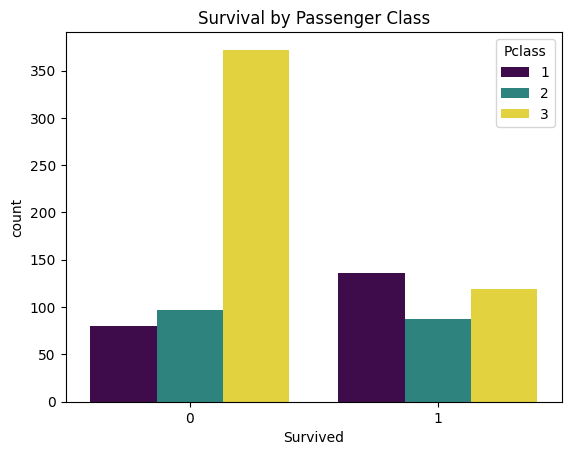

In [7]:
sns.countplot(x="Survived", hue="Pclass", data=train, palette="viridis")
plt.title("Survival by Passenger Class")
plt.show()


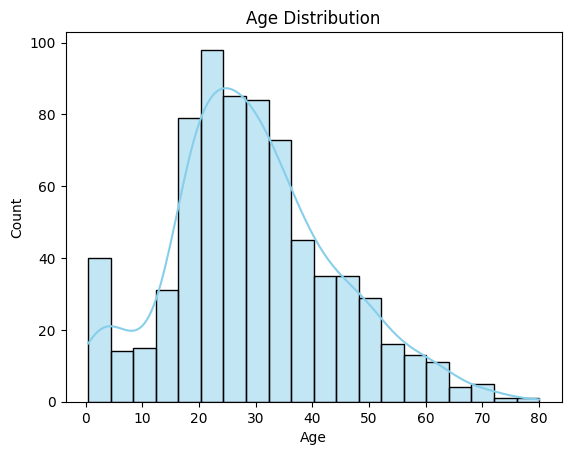

In [8]:
sns.histplot(train['Age'].dropna(), kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()


In [10]:
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

test['Fare'] = test['Fare'].fillna(test['Fare'].median())


In [11]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))


Accuracy: 0.7932960893854749


In [13]:
test_features = test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
predictions = model.predict(test_features)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("titanic_submission.csv", index=False)
files.download("titanic_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9

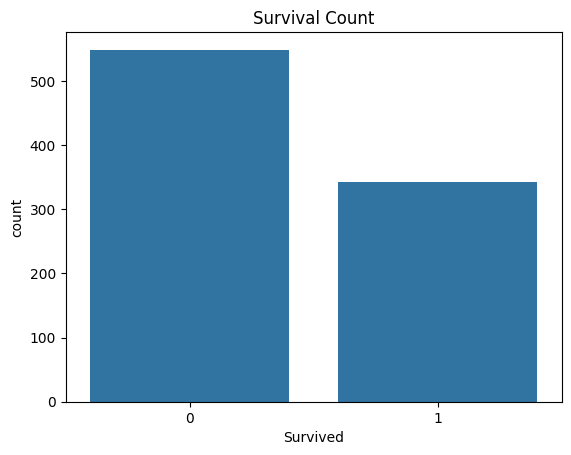

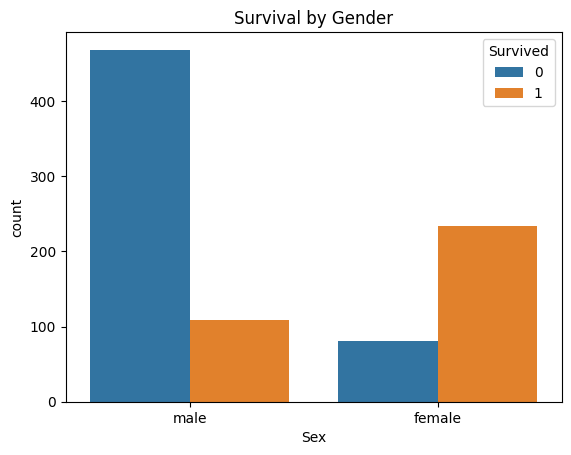

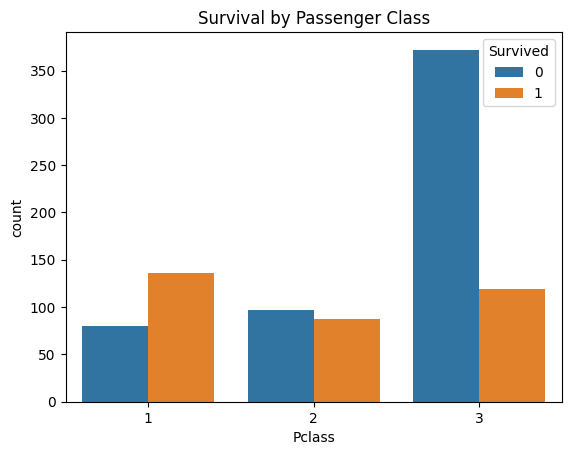

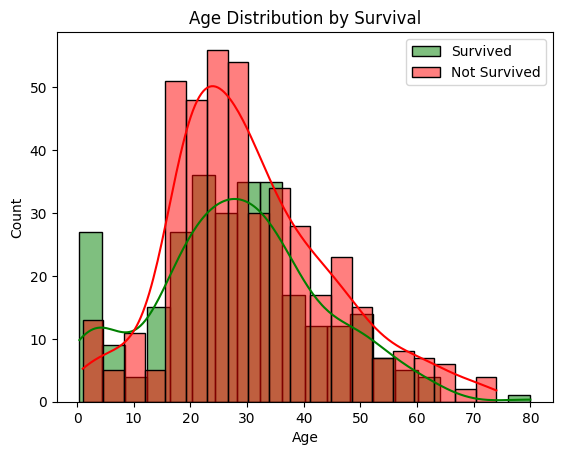

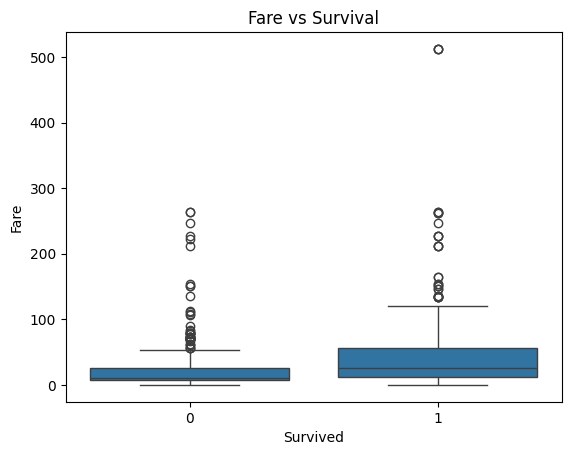

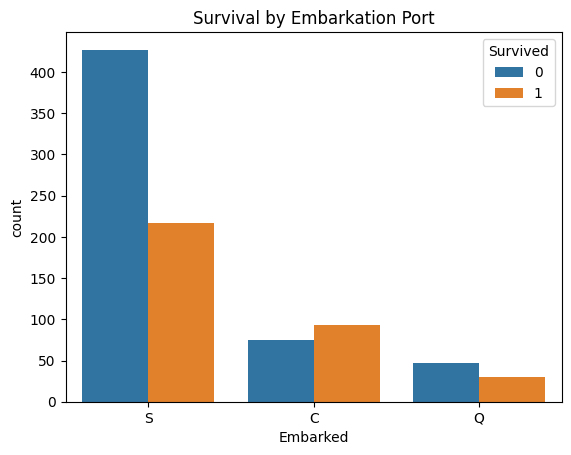

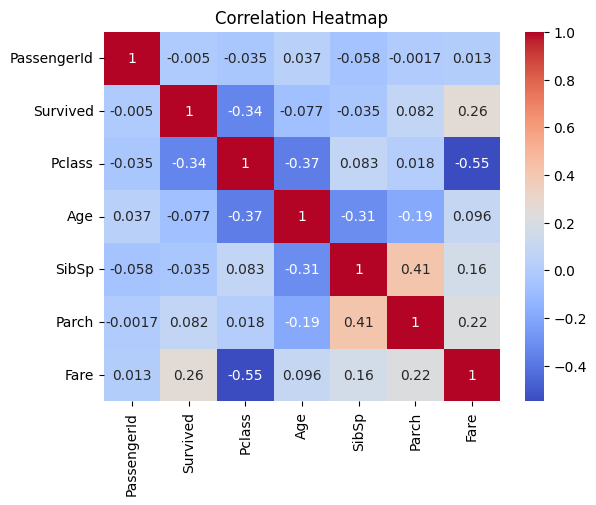

In [15]:
from google.colab import drive
drive.mount('/content/drive')

!pip install pandas matplotlib seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

print(train.head())
print(train.info())
print(train.describe())

#visuals
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train)
plt.title("Survival by Gender")
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title("Survival by Passenger Class")
plt.show()

sns.histplot(train[train['Survived']==1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(train[train['Survived']==0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

sns.boxplot(x='Survived', y='Fare', data=train)
plt.title("Fare vs Survival")
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title("Survival by Embarkation Port")
plt.show()

# Drop non-numeric columns before calculating correlation
numeric_train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
sns.heatmap(numeric_train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()